Index(['PlayID', 'MovieID', 'PlayWeek', 'Weekend', 'Play_nWeek', 'PlayMonth',
       'PlayYear', 'ViewDay', 'CutBack', 'GHA_View_Code', 'TFF_View_Code',
       'Theater_Class', 'Audience', 'Tempture', 'Rainfall', 'No_Weather',
       'MovieFest', 'Rated', 'Class_Darma', 'Class_Comedy', 'Class_Action',
       'Class_Documentary', 'Class_Animation', 'Class_Other', 'Class_#N/A',
       'Movie_Length', 'No_Movie_Length', 'Director_Award', 'Producer_Famous',
       'Distrbutor', 'Budget', 'No_Budget', 'Actor_Awardall', 'Subsidy_Amount',
       'Subsidy_Yes', 'IMDb_rating', 'No_IMDb', 'Oscar_Nom',
       'Oscar_AwardTotal', 'No_Oscar', 'Cannes_Nom', 'Cannes_AwardTotal',
       'No_Cannes', 'GHA_Nom', 'GHA_AwardTotal', 'No_GHA', 'TFF_Nom',
       'TFF_AwardTotal', 'No_TFF', 'TFF_NomData', 'view_afhorse',
       'view_aftaipei', 'year_2018', 'year_2019', 'year_2020', 'year_2021',
       'year_2022', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 

/var/folders/td/m175xz391hd4h1j11qwz0vyc0000gn/T/ipykernel_57824/3315979169.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['No_Budget'].fillna(0, inplace=True)
/var/folders/td/m175xz391hd4h1j11qwz0vyc0000gn/T/ipykernel_57824/3315979169.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

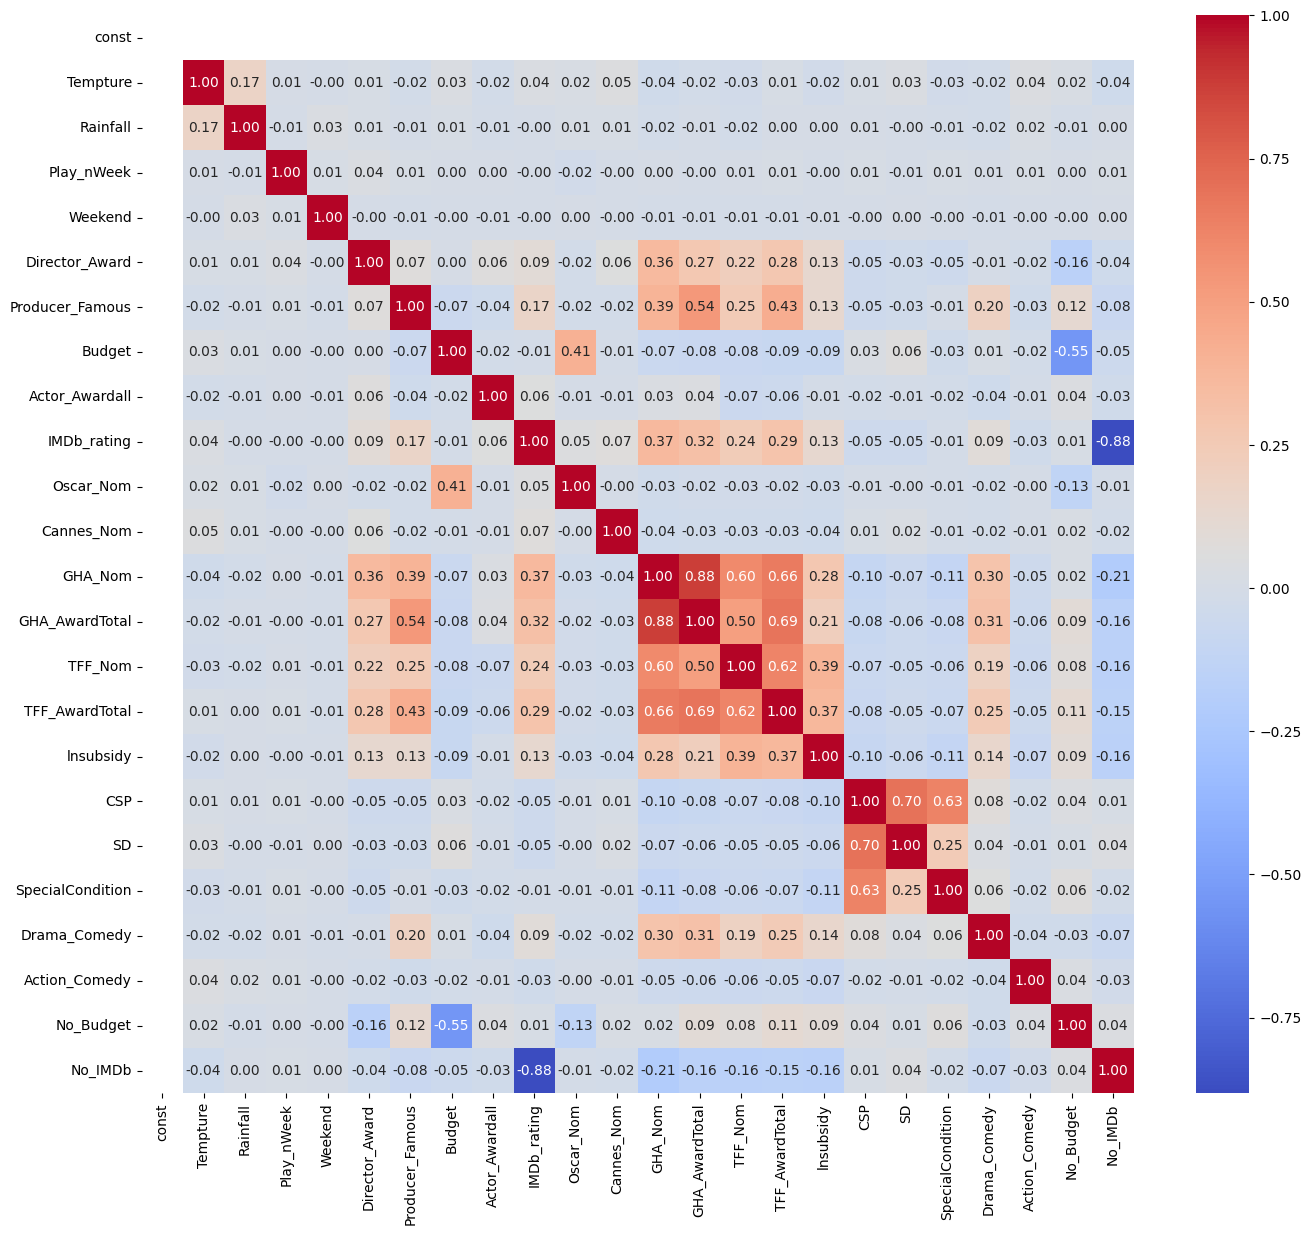

In [147]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取數據
data = pd.read_csv('Movie.csv')

# 去除列名中的空格
data.columns = data.columns.str.strip()

# 確認列名稱
print(data.columns)

# 生成缺失變數
data['CSP'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(3, 6))).astype(int)
data['SD'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(4, 6))).astype(int)
data['SpecialCondition'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(1, 4))).astype(int)
data['Drama_Comedy'] = ((data['Class_Darma'] == 1) & (data['Class_Comedy'] == 1)).astype(int)
data['Action_Comedy'] = ((data['Class_Action'] == 1) & (data['Class_Comedy'] == 1)).astype(int)

# 填充缺失值
data['No_Budget'].fillna(0, inplace=True)
data['No_IMDb'].fillna(0, inplace=True)

# 將 Audience 取對數
data['Log_Audience'] = np.log(data['Audience'] + 1)

# 設置自變數和應變數
X = data[['Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 'Director_Award', 'Producer_Famous', 'Budget', 
          'Actor_Awardall', 'IMDb_rating', 'Oscar_Nom', 'Cannes_Nom', 'GHA_Nom', 'GHA_AwardTotal', 
          'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 'CSP', 'SD', 'SpecialCondition', 'Drama_Comedy', 
          'Action_Comedy', 'No_Budget', 'No_IMDb']]
y = data['Log_Audience']

# 添加常數項
X = sm.add_constant(X)

# 拟合模型
model = sm.OLS(y, X).fit()

# 打印回归结果
print(model.summary())

# 繪製相關矩陣
plt.figure(figsize=(16, 14))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [148]:
# 第一組變數
X1 = data[['Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 'Director_Award', 'Producer_Famous', 'Budget', 
           'Actor_Awardall', 'IMDb_rating']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()
print(model1.summary())

# 第二組變數
X2 = data[['Oscar_Nom', 'Cannes_Nom', 'GHA_Nom', 'GHA_AwardTotal', 'TFF_Nom', 'TFF_AwardTotal', 
           'lnsubsidy', 'CSP', 'SD', 'SpecialCondition', 'Drama_Comedy', 'Action_Comedy', 'No_Budget', 'No_IMDb']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:           Log_Audience   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     740.7
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:21:18   Log-Likelihood:            -1.3277e+05
No. Observations:               74232   AIC:                         2.656e+05
Df Residuals:                   74222   BIC:                         2.657e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.1166      0.020    1

In [149]:
# 生成交互項變數
data['Pandemic_Interaction'] = data['SD'] * data['IMDb_rating']
data['Famous_Sequel'] = (data['Director_Award'] & data['Producer_Famous']).astype(int)

# 更新回歸模型加入交互項
X_interaction = data[['Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 'Director_Award', 'Producer_Famous', 'Budget', 
                      'Actor_Awardall', 'IMDb_rating', 'Oscar_Nom', 'Cannes_Nom', 'GHA_Nom', 'GHA_AwardTotal', 
                      'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 'CSP', 'SD', 'SpecialCondition', 'Drama_Comedy', 
                      'Action_Comedy', 'No_Budget', 'No_IMDb', 'Pandemic_Interaction', 'Famous_Sequel']]
X_interaction = sm.add_constant(X_interaction)
model_interaction = sm.OLS(y, X_interaction).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:           Log_Audience   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     370.4
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:21:18   Log-Likelihood:            -1.3160e+05
No. Observations:               74232   AIC:                         2.633e+05
Df Residuals:                   74206   BIC:                         2.635e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.5322 

Index(['PlayID', 'MovieID', 'PlayWeek', 'Weekend', 'Play_nWeek', 'PlayMonth',
       'PlayYear', 'ViewDay', 'CutBack', 'GHA_View_Code', 'TFF_View_Code',
       'Theater_Class', 'Audience', 'Tempture', 'Rainfall', 'No_Weather',
       'MovieFest', 'Rated', 'Class_Darma', 'Class_Comedy', 'Class_Action',
       'Class_Documentary', 'Class_Animation', 'Class_Other', 'Class_#N/A',
       'Movie_Length', 'No_Movie_Length', 'Director_Award', 'Producer_Famous',
       'Distrbutor', 'Budget', 'No_Budget', 'Actor_Awardall', 'Subsidy_Amount',
       'Subsidy_Yes', 'IMDb_rating', 'No_IMDb', 'Oscar_Nom',
       'Oscar_AwardTotal', 'No_Oscar', 'Cannes_Nom', 'Cannes_AwardTotal',
       'No_Cannes', 'GHA_Nom', 'GHA_AwardTotal', 'No_GHA', 'TFF_Nom',
       'TFF_AwardTotal', 'No_TFF', 'TFF_NomData', 'view_afhorse',
       'view_aftaipei', 'year_2018', 'year_2019', 'year_2020', 'year_2021',
       'year_2022', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 

/var/folders/td/m175xz391hd4h1j11qwz0vyc0000gn/T/ipykernel_57824/278989515.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['No_Budget'].fillna(0, inplace=True)
/var/folders/td/m175xz391hd4h1j11qwz0vyc0000gn/T/ipykernel_57824/278989515.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

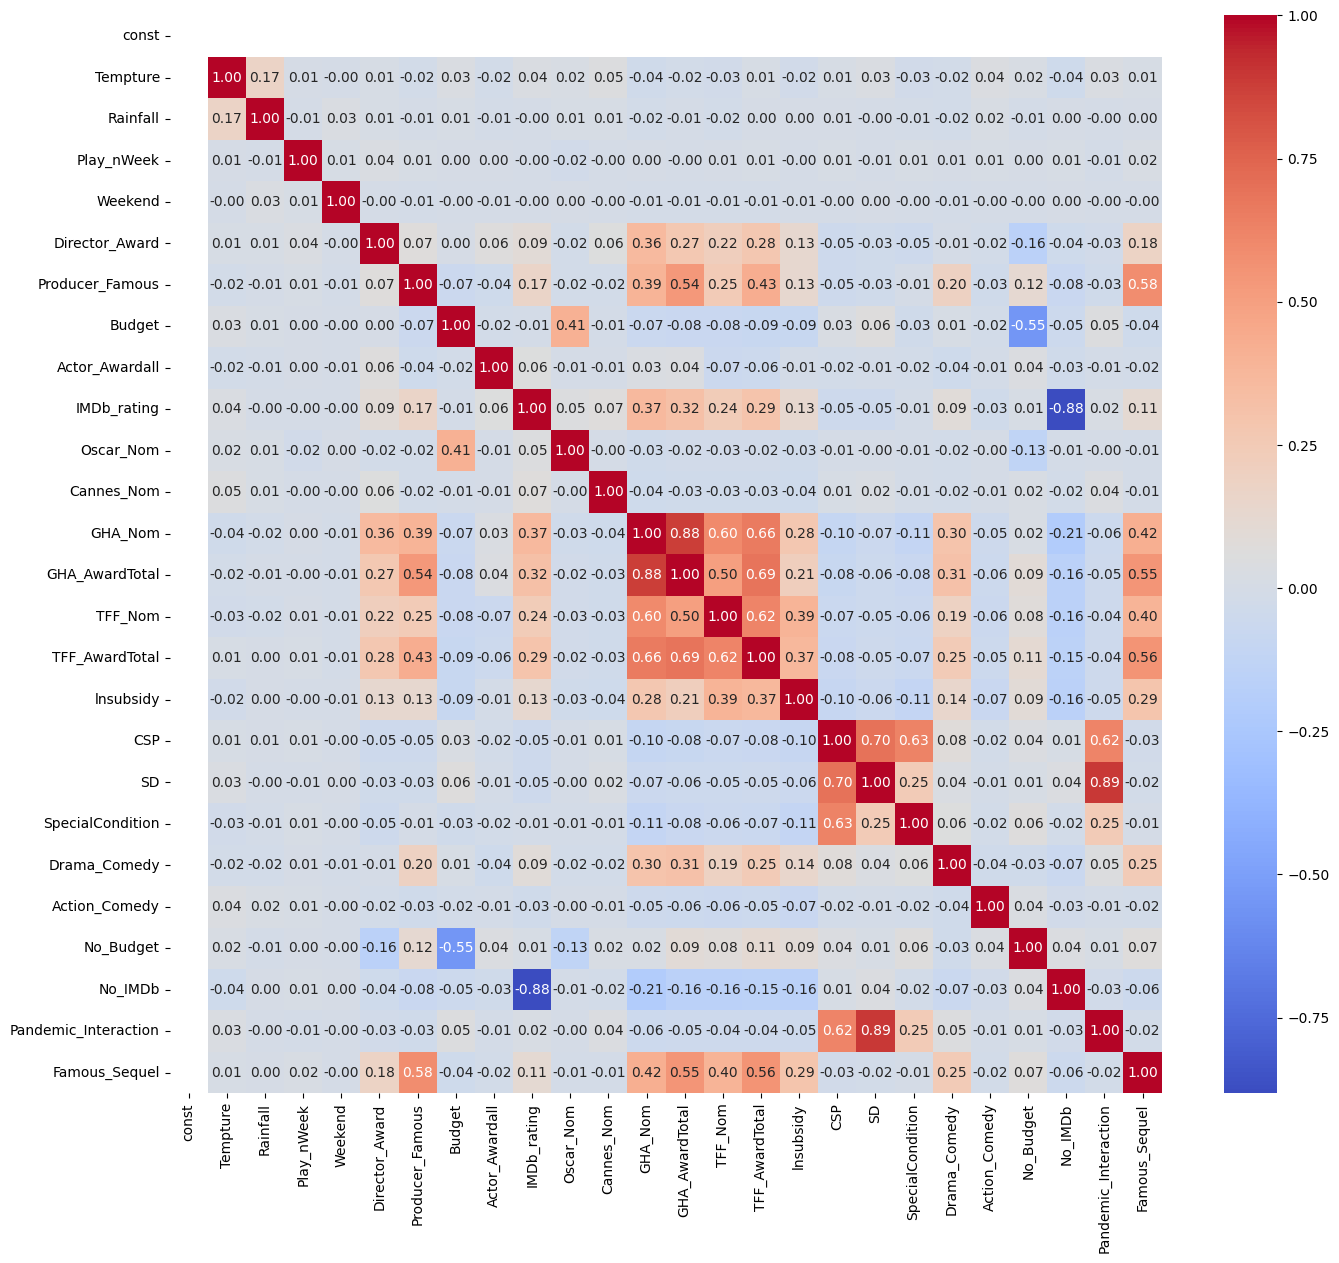

In [150]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取數據
data = pd.read_csv('Movie.csv')


# 去除列名中的空格
data.columns = data.columns.str.strip()

# 確認列名稱
print(data.columns)

# 生成缺失變數
data['CSP'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(3, 6))).astype(int)
data['SD'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(4, 6))).astype(int)
data['SpecialCondition'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(1, 4))).astype(int)
data['Drama_Comedy'] = ((data['Class_Darma'] == 1) & (data['Class_Comedy'] == 1)).astype(int)
data['Action_Comedy'] = ((data['Class_Action'] == 1) & (data['Class_Comedy'] == 1)).astype(int)

# 填充缺失值
data['No_Budget'].fillna(0, inplace=True)
data['No_IMDb'].fillna(0, inplace=True)

# 將 Audience 取對數
data['Log_Audience'] = np.log(data['Audience'] + 1)

# 設置自變數和應變數
X = data[['Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 'Director_Award', 'Producer_Famous', 'Budget', 
          'Actor_Awardall', 'IMDb_rating', 'Oscar_Nom', 'Cannes_Nom', 'GHA_Nom', 'GHA_AwardTotal', 
          'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 'CSP', 'SD', 'SpecialCondition', 'Drama_Comedy', 
          'Action_Comedy', 'No_Budget', 'No_IMDb']]

# 生成交互項變數
data['Pandemic_Interaction'] = data['SD'] * data['IMDb_rating']
data['Famous_Sequel'] = (data['Director_Award'] & data['Producer_Famous']).astype(int)

# 更新自變數
X = data[['Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 'Director_Award', 'Producer_Famous', 'Budget', 
          'Actor_Awardall', 'IMDb_rating', 'Oscar_Nom', 'Cannes_Nom', 'GHA_Nom', 'GHA_AwardTotal', 
          'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 'CSP', 'SD', 'SpecialCondition', 'Drama_Comedy', 
          'Action_Comedy', 'No_Budget', 'No_IMDb', 'Pandemic_Interaction', 'Famous_Sequel']]

y = data['Log_Audience']

# 添加常數項
X = sm.add_constant(X)

# 拟合模型
model = sm.OLS(y, X).fit()

# 打印回归结果
print(model.summary())

# 繪製相關矩陣
plt.figure(figsize=(16, 14))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [151]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import quantreg

# 讀取數據
file_path = 'Movie.csv'  # 更新為您的文件路徑
data = pd.read_csv(file_path)

# 去除列名空格
data.columns = data.columns.str.strip()

# 生成新變數
data['CSP'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(3, 6))).astype(int)
data['SD'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(4, 6))).astype(int)
data['SpecialCondition'] = ((data['PlayYear'] == 2020) & (data['PlayMonth'].between(1, 4))).astype(int)
data['Drama_Comedy'] = ((data['Class_Darma'] == 1) & (data['Class_Comedy'] == 1)).astype(int)
data['Action_Comedy'] = ((data['Class_Action'] == 1) & (data['Class_Comedy'] == 1)).astype(int)

# 添加假日和特殊情況變數
national_holidays = [1, 2, 4, 5, 6, 8, 9, 10, 12]
data['Holiday'] = data['PlayMonth'].apply(lambda x: 1 if x in national_holidays else 0)

# 處理缺失值
data['No_Budget'].fillna(0, inplace=True)
data['No_IMDb'].fillna(0, inplace=True)

# Log 變換
data['Log_Audience'] = np.log1p(data['Audience'])

# DID變數
data['Pandemic'] = (data['PlayYear'] >= 2020).astype(int)

# 交乘項
data['Pandemic_Interaction'] = data['Pandemic'] * data['CSP']
data['Famous_Sequel'] = data['Producer_Famous'] * data['Budget']  # 示例交乘項

# 獲得多個獎項
data['Multiple_Awards'] = (data[['Oscar_Nom', 'Cannes_Nom', 'GHA_Nom', 'TFF_Nom']].sum(axis=1) > 1).astype(int)

# 特殊情況
data['Midterm_Final'] = ((data['PlayMonth'] == 6) | (data['PlayMonth'] == 12)).astype(int)
data['Typhoon'] = ((data['Tempture'] < 25) & (data['Rainfall'] > 100)).astype(int)
data['Earthquake'] = ((data['PlayYear'] == 2018) & (data['PlayMonth'] == 2)).astype(int)  # 示例地震年份和月份


/var/folders/td/m175xz391hd4h1j11qwz0vyc0000gn/T/ipykernel_57824/4211506050.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['No_Budget'].fillna(0, inplace=True)
/var/folders/td/m175xz391hd4h1j11qwz0vyc0000gn/T/ipykernel_57824/4211506050.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [152]:
X = data[['Tempture', 'Rainfall', 'Play_nWeek', 'Weekend', 'Director_Award', 'Producer_Famous', 'Budget',
          'Actor_Awardall', 'IMDb_rating', 'Oscar_Nom', 'Cannes_Nom', 'GHA_Nom', 'GHA_AwardTotal',
          'TFF_Nom', 'TFF_AwardTotal', 'lnsubsidy', 'CSP', 'SD', 'SpecialCondition', 'Drama_Comedy',
          'Action_Comedy', 'No_Budget', 'No_IMDb', 'Pandemic_Interaction', 'Famous_Sequel',
          'Holiday', 'Midterm_Final', 'Typhoon', 'Earthquake']]

X = sm.add_constant(X)
y = data['Log_Audience']

ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:           Log_Audience   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     346.0
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:21:20   Log-Likelihood:            -1.3141e+05
No. Observations:               74232   AIC:                         2.629e+05
Df Residuals:                   74203   BIC:                         2.631e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.3832 

In [153]:
X_did = data[['Pandemic', 'CSP', 'Pandemic_Interaction', 'Tempture', 'Rainfall', 'Weekend', 'Producer_Famous', 'Budget', 'lnsubsidy']]
X_did = sm.add_constant(X_did)
did_model = sm.OLS(y, X_did).fit()
print(did_model.summary())


                            OLS Regression Results                            
Dep. Variable:           Log_Audience   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     777.3
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:21:20   Log-Likelihood:            -1.3298e+05
No. Observations:               74232   AIC:                         2.660e+05
Df Residuals:                   74223   BIC:                         2.661e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.0615 

In [154]:
quantiles = [0.25, 0.5, 0.75]
models = []
for q in quantiles:
    mod = quantreg('Log_Audience ~ Tempture + Rainfall + Play_nWeek + Weekend + Director_Award + Producer_Famous + Budget + Actor_Awardall + IMDb_rating + Oscar_Nom + Cannes_Nom + GHA_Nom + GHA_AwardTotal + TFF_Nom + TFF_AwardTotal + lnsubsidy + CSP + SD + SpecialCondition + Drama_Comedy + Action_Comedy + No_Budget + No_IMDb + Pandemic_Interaction + Famous_Sequel', data).fit(q=q)
    models.append(mod)
    print(f'Quantile {q}')
    print(mod.summary())


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


Quantile 0.25
                         QuantReg Regression Results                          
Dep. Variable:           Log_Audience   Pseudo R-squared:              0.04650
Model:                       QuantReg   Bandwidth:                      0.1520
Method:                 Least Squares   Sparsity:                        4.609
Date:                Mon, 10 Jun 2024   No. Observations:                74232
Time:                        19:21:45   Df Residuals:                    74207
                                        Df Model:                           24
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2900      0.061      4.788      0.000       0.171       0.409
Tempture                 0.0124      0.001     20.021      0.000       0.011       0.014
Rainfall                -0.0012      0.001     -2.198      0.028      -0.002 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


Quantile 0.5
                         QuantReg Regression Results                          
Dep. Variable:           Log_Audience   Pseudo R-squared:              0.04291
Model:                       QuantReg   Bandwidth:                      0.1752
Method:                 Least Squares   Sparsity:                        3.796
Date:                Mon, 10 Jun 2024   No. Observations:                74232
Time:                        19:22:09   Df Residuals:                    74207
                                        Df Model:                           24
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6150      0.061     10.141      0.000       0.496       0.734
Tempture                 0.0159      0.001     27.074      0.000       0.015       0.017
Rainfall             -6.963e-05      0.001     -0.132      0.895      -0.001  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])
